# Exploratory Data Analysis on Automobile Dataset

Main question: "What are the main characteristics which have the most impact on the car price?"

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="https://#import_data">Import Data from Module</a></li>
    <li><a href="https://#discriptive_statistics">Descriptive Statistical Analysis</a></li>
    <li><a href="https://#pattern_visualization">Analyzing Individual Feature Patterns using Visualization</a></li>
    <li><a href="https://#basic_grouping">Basics of Grouping</a></li>
    <li><a href="https://#correlation_causation">Correlation and Causation</a></li>
    <li><a href="https://#anova">ANOVA</a></li>
</ol>

</div>

<hr>

## Importing data and libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the data and storing it in a dataframe

In [19]:
path='D:\Program Files (x86)\Programming\Projects\IBM Data Analysis with Python\\automobileEDA.csv'
df = pd.read_csv(path)

In [20]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


## Descriptive Statistical Analysis

Descriptive statistics can provide the basic features of data and also give short summaries about the sample and measures of the data

In [21]:
# Calculates basic statistics like mean,median,standard deviation

df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [22]:
#Used to summarize categorical data

df['body-style'].value_counts()

sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64

In [23]:
df['fuel-system'].value_counts()

mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
spfi     1
mfi      1
Name: fuel-system, dtype: int64

In [24]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [25]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [26]:
body_style_counts = df['body-style'].value_counts().to_frame()
body_style_counts.rename(columns={'body-style':'value_counts'}, inplace=True)
body_style_counts

,value_counts
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


In [27]:
body_style_counts.index.name = 'body-style'
body_style_counts

,value_counts
body-style,
sedan,94
hatchback,68
wagon,25
hardtop,8
convertible,6


## Analyzing Individual Feature Patterns Using Visualization

In [28]:
%%capture
! pip install seaborn

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Choosing Visualization Technique

When visualizing individual features,it is important to understand what type of feature we are dealing with. This will help us in choosing appropriate visualization method for the feature.

In [30]:
# listing datatypes for each column

print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Q. Find the correlation between the following columns: bore, stroke, compression-ratio, and horsepower.

In [31]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187923,0.098462
compression-ratio,0.001263,0.187923,1.000000,-0.214514
horsepower,0.566936,0.098462,-0.214514,1.000000


## Scatterplot

A great way to visualize relationship between two continuous variables is a Scatter plot with fitted line.

Let's find the scatter plot for engine size and price using regplot.

### Positive Linear relationship

(0.0, 53409.4067660255)

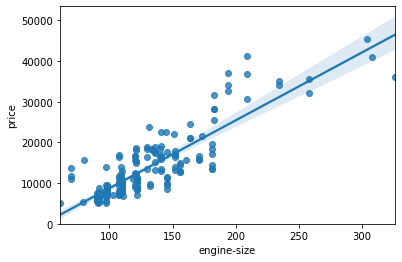

In [32]:
sns.regplot(x="engine-size", y="price", data = df)
plt.ylim(0,)

(0.0, 47537.15077343422)

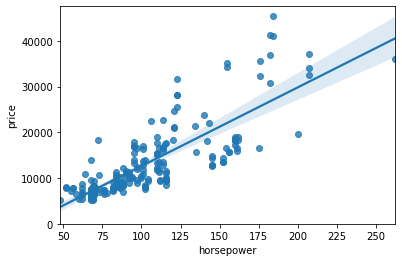

In [33]:
sns.regplot(x="horsepower", y="price", data=df)
plt.ylim(0,)

In [34]:
df[['horsepower','price']].corr()

,horsepower,price
horsepower,1.000000,0.809575
price,0.809575,1.000000


### Negative Linear relationship

(0.0, 48258.10054360782)

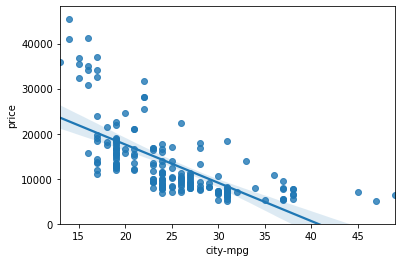

In [35]:
sns.regplot(x="city-mpg", y="price", data=df)
plt.ylim(0,)

(0.0, 48155.293356628026)

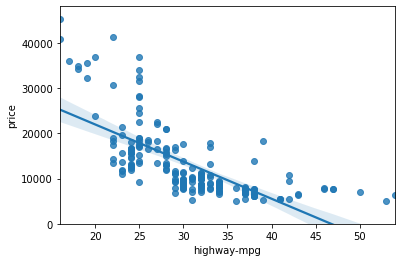

In [36]:
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

### Weak Linear relationship

(0.0, 47414.1)

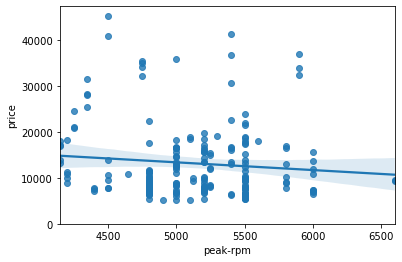

In [37]:
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [38]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


(0.0, 47414.1)

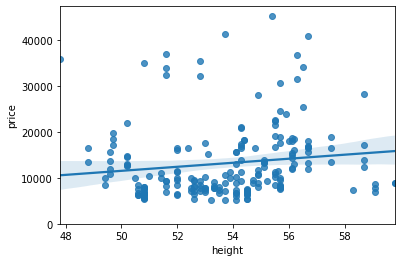

In [39]:
sns.regplot(x="height",y="price",data=df)
plt.ylim(0,)

## Boxplots

Boxplots are great for visualizing categorical variables.

<AxesSubplot:xlabel='body-style', ylabel='price'>

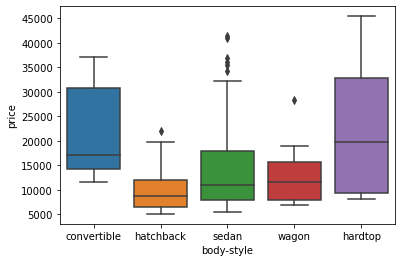

In [40]:
# Let's look at the relationship between body style and price
sns.boxplot(x="body-style", y="price", data=df)

<AxesSubplot:xlabel='fuel-system', ylabel='price'>

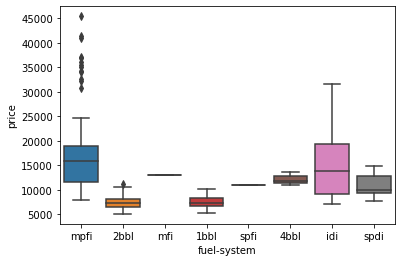

In [41]:
# Relation between fuel system and price
sns.boxplot(x="fuel-system", y="price", data=df)

<AxesSubplot:xlabel='aspiration', ylabel='price'>

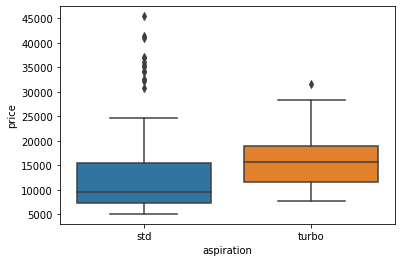

In [42]:
#Relation between aspiration and price
sns.boxplot(x="aspiration",y='price',data=df)

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

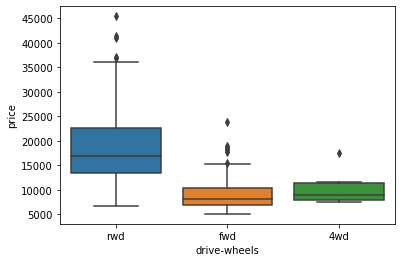

In [43]:
# Relation between drive wheels and price
sns.boxplot(x="drive-wheels", y="price", data=df)

## GroupBy

The "groupby" method groups data by different categories. The data is grouped based on one or several categorical variables. Let's group by variable, "body-style". There are five categories in "body-style".

In [44]:
df['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

If we want to know that on average which type of body style is most valuable, we can group "body-style" and calculate average.

In [45]:
df_group = df[['body-style','drive-wheels','price']]

In [46]:
# Grouping single variable

df_group = df_group.groupby(['body-style'],as_index=False).mean()
df_group

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


In [47]:
# Grouping multiple variables

df_gptest = df[['drive-wheels','body-style','price']]
grouped_test = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [48]:
# This grouped data is easy to visualize when we use a pivot method. Pivot displays one variable along the column and other variables along the rows

grouped_pivot = grouped_test.pivot(index="body-style",columns="drive-wheels")
grouped_pivot

price                            
drive-wheels           4wd           fwd           rwd
body-style                                            
convertible            NaN  11595.000000  23949.600000
hardtop                NaN   8249.000000  24202.714286
hatchback      7603.000000   8396.387755  14337.777778
sedan         12647.333333   9811.800000  21711.833333
wagon          9095.750000   9997.333333  16994.222222

### Heat map

Let's use a Heat Map to plot target variable over multiple variables and check relationships

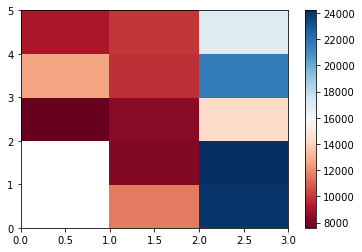

In [49]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

## Correlation and Causation

<b>Correlation</b> is a statistical method for measuring to what extent different variables are interdependent.

<b>Causation</b> is the relationship between cause and effect between two variables.

For example,
<ul>
    <li>Smoking and Lung Cancer have correlation</li>
    <li>Rain and Umbrella have correlation</li>
</ul>

Correlation does not imply Causation. In other words, having an umbrella does not imply that it is going to rain outside.

<p><b>Pearson Correlation</b></p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Perfect positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Perfect negative linear correlation.</li>
</ul>

Pearson Correlation is the default method in corr().

<b>P-value</b>

The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [50]:
from scipy import stats

### Wheel-Base vs Price

Calculating the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'

In [55]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'],df['price'])
print(f"The Pearson Correlation Coefficient is: {pearson_coef} with a p-value of: {p_value}")

The Pearson Correlation Coefficient is: 0.5846418222655081 with a p-value of: 8.076488270732989e-20


### Horsepower vs Price

Calculating the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'

In [52]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'],df['price'])
print(f"The Pearson Correlation Coefficient is: {pearson_coef} with a p-value of: {p_value}")

The Pearson Correlation Coefficient is: 0.809574567003656 with a p-value of: 6.369057428259557e-48


### Engine Size vs Price

Calculating the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price'

In [53]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'],df['price'])
print(f"The Pearson Correlation Coefficient is: {pearson_coef} with a p-value of: {p_value}")

The Pearson Correlation Coefficient is: 0.8723351674455185 with a p-value of: 9.265491622198389e-64


### Peak-RPM vs Price

Calculating the Pearson Correlation Coefficient and P-value of 'peak-rpm' and 'price'

In [54]:
pearson_coef, p_value = stats.pearsonr(df['peak-rpm'],df['price'])
print(f"The Pearson Correlation Coefficient is: {pearson_coef} with a p-value of: {p_value}")

The Pearson Correlation Coefficient is: -0.10161587407588146 with a p-value of: 0.1511769165144532


## ANOVA

<h3>ANOVA: Analysis of Variance</h3>
<p>The Analysis of Variance  (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:</p>

<p><b>F-test score</b>: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.</p>

<p><b>P-value</b>:  P-value tells how statistically significant our calculated score value is.</p>

<p>If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.</p>

<p>Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.</p>

<p>To see if different types of 'drive-wheels' impact  'price', we group the data.</p>


In [58]:
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [57]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [59]:
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [60]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


The results show that there is a larger difference between means of different groups as F-value is high and the P-value shows that our results are statistically significant. Now let's examine the three groups separately.

#### fwd and rwd

In [63]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


#### 4wd and rwd


In [64]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


### 4wd and fwd

In [65]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])

print( "ANOVA results: F=", f_val, ", P=", p_val)

ANOVA results: F= 0.665465750252303 , P= 0.41620116697845666


## Conclusion: Important Variables

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>